In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=8d31d3083e61fa34539f83e607cd0deeaa7ef2043e51012e97da50b8d8efdd06
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, exposure
import cv2

In [ ]:
from google.colab import drive
drive.mount("/ColabNotebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /ColabNotebooks


In [ ]:
cd"/ColabNotebooks"

/ColabNotebooks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/ColabNotebooks


In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

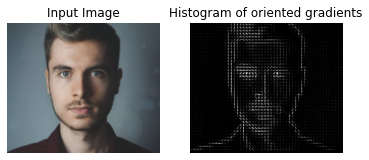

In [ ]:
image=cv2.imread("/content/drive/My Drive/Colab Notebooks/face1.jpeg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fd,hog_image=hog(image,orientations=9,pixels_per_cell=(10,10),cells_per_block=(2,2),visualize=True,multichannel=True)
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True)

ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title("Histogram of oriented gradients")
plt.show()

In [ ]:
len(fd)

72324

In [ ]:
image.shape

(427, 500, 3)

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

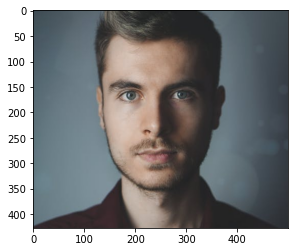

In [ ]:
image=cv2.imread("/content/drive/My Drive/Colab Notebooks/face1.jpeg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations=face_recognition.face_locations(image)
numberoffaces=len(face_locations)
print(numberoffaces,"<--found these many faces")

1 <--found these many faces


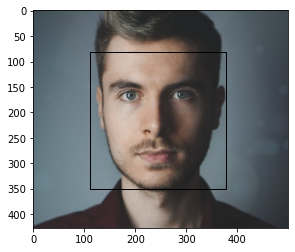

In [ ]:
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  # ("A faceis locatprinted Top:{} , left :{} , Bottom:{},Right:{}",format(x,y,w,h))


  rect=Rectangle((x,y),w-x,h-y,fill=False,color='black')
  ax.add_patch(rect)
plt.show()

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
image=cv2.imread("/content/drive/My Drive/Colab Notebooks/face1.jpeg")
face_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/drive/My Drive/Colab Notebooks/billgates.jpg")
billgates=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/drive/My Drive/Colab Notebooks/face2.jpg")
face2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
face_demo_encoding=face_recognition.face_encodings(face_demo)[0]
bill_encoding=face_recognition.face_encodings(billgates)[0]
face2encoding=face_recognition.face_encodings(face2)[0]
known_face_encodings=[
                      face_demo_encoding,
                      bill_encoding,
                      face2encoding
]

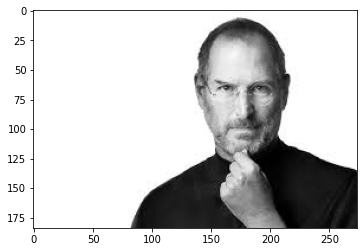

In [ ]:
image=cv2.imread("/content/drive/My Drive/Colab Notebooks/billgates.jpg")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_face_encoding=face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance
for unknown_face_encodings in unknown_face_encoding:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.5
  results=np.array(results) <= threshold
  name="Unknown"
  if results[0]:
    name="FaceDemo Image"
  elif results[1]:
    name="Bill gates"
  elif results[2]:
    name="bill"
  print(f"Found in {name} in the photo!")

Found in Bill gates in the photo!


In [ ]:
face_landmarks_list=face_recognition.face_landmarks(image)

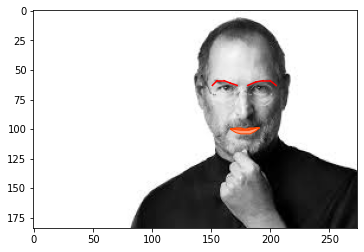

In [ ]:
import matplotlib.pyplot as nlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for(x,y) in left_eyebrow_pts[1:]:
    l=nlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y


  right_eyebrow_pts=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for(x,y) in right_eyebrow_pts[1:]:
    l=nlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  p=Polygon(face_landmarks["top_lip"],facecolor="lightsalmon",edgecolor="orangered")
  ax.add_patch(p)
  p=Polygon(face_landmarks["bottom_lip"],facecolor="lightsalmon",edgecolor="orangered")
  ax.add_patch(p) 
plt.show() 
